In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.

(a) Download the Combined Cycle Power Plant data1 from:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

Answer : loaded into CCPP folder. using sheet 1 data as instructed

(b) Exploring the data: ( 5 pts)


In [3]:
#two files are present , checking if both are same
path = os.getcwd()
display(path)

#df2= pd.read_excel("/CCPP/Folds5x2_pp.ods", engine="odf")


'f:\\AssignmentsUSC\\Homework2\\homework-2-niveditha-7'


i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [4]:
df= pd.read_excel(path+'\CCPP\Folds5x2_pp.xlsx', sheet_name='Sheet1')    
display(df)
print('number of columns is' ,len(df.columns), 'and number of rows:', len(df))

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


number of columns is 5 and number of rows: 9568


answer: there are 9568 rows which represents predictors/independent variables/features - ambient variables Temperature (AT), Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP). First 4 columns contain data points for each of the predictors and last column PE is the electrical energy output column.

ii. Make pairwise scatterplots (scatter matrix) of all the varianbles in the data set
including the predictors (independent variables) with the dependent variable.
Describe your Findings.

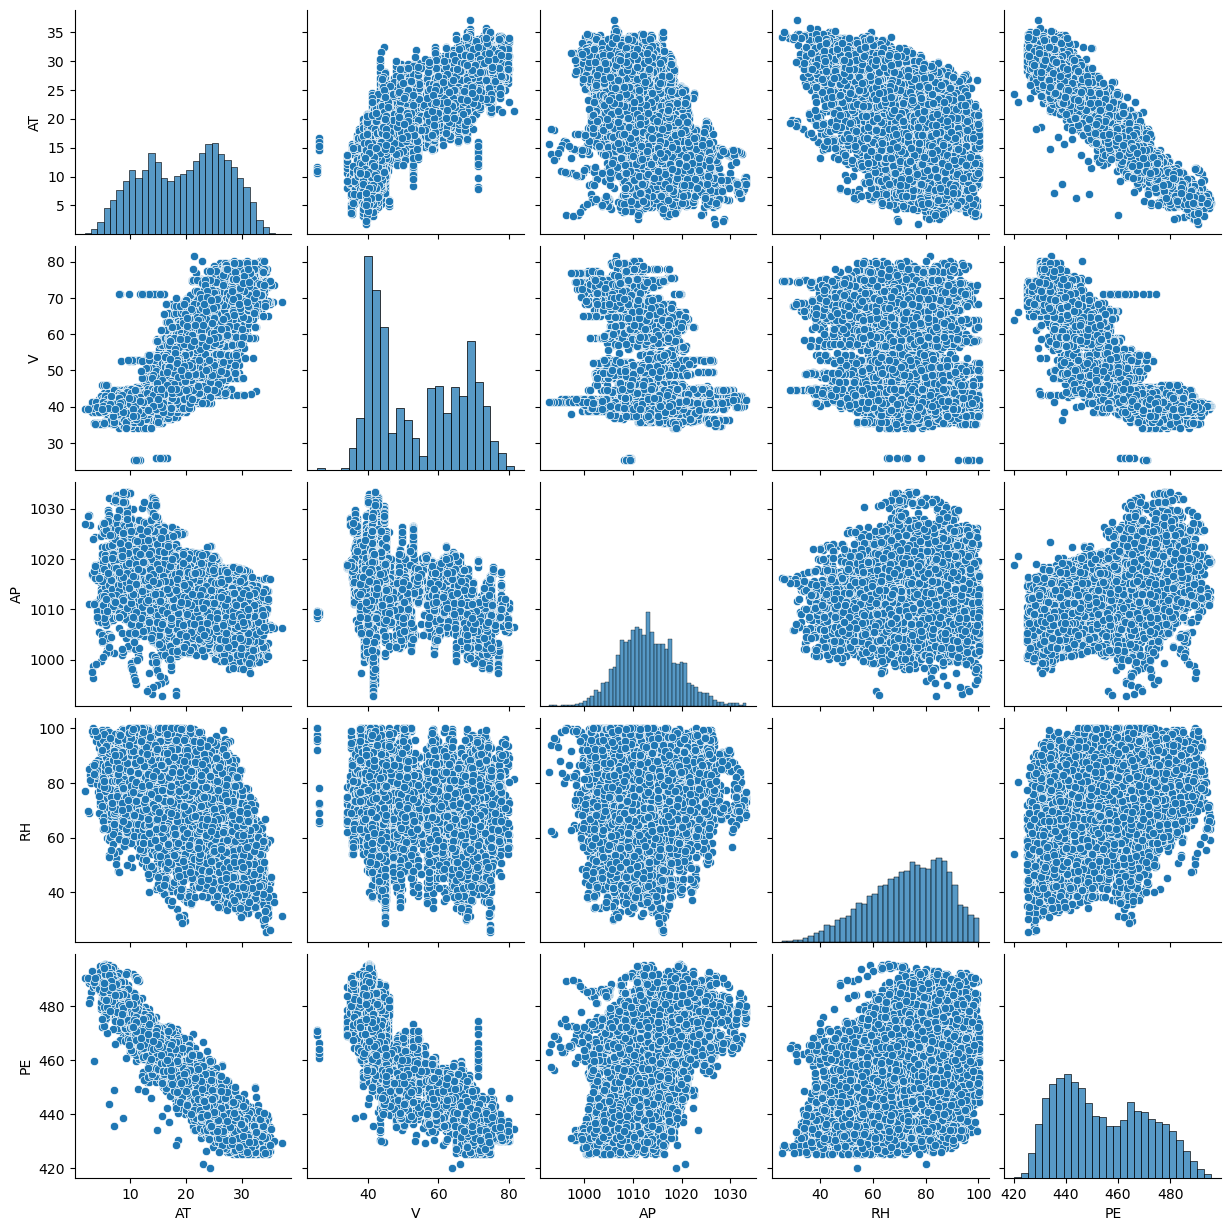

In [5]:
vars = df.columns
sns.pairplot(data=df)#since we are using all the variables including dependent and independent.

if we just look at the last row, from the above scatter plot, we see that there appears to be negative co-relation between AT(Ambient variable temperature), V(Exhaust Vaccum) with the net hourly electrical energy output (PE). There is also an indication of strong relationship between AT and PE. Next best is Exhaust Vaccum.

However there appears to be no clear information if AP(although shows slightly positive corelation) and RH(Relative Humidity) are co related with output PE. i.e weak correlation is found between features AP, RH with output PE

iii. What are the mean, the median, range,First and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table.

In [6]:
stats = df.describe().T 
stats_tables = pd.DataFrame(columns = ['Mean', 'Median', 'Range', 'First Quartile (25%)', 'Third Quartile (75%)', 'Interquartile Range (IQR)'])

stats_tables['Mean'] = stats['mean']
stats_tables['Range'] = stats['max'] - stats['min']
stats_tables['Median'] = stats['50%']
stats_tables['First Quartile (25%)'] = stats['25%']
stats_tables['Third Quartile (75%)'] = stats['75%']
stats_tables['Interquartile Range (IQR)']= stats['75%'] - stats['25%']

display(stats_tables)

,Mean,Median,Range,First Quartile (25%),Third Quartile (75%),Interquartile Range (IQR)
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


(c) For each predictor, Fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks? (10 pts)

In [7]:
print(list(df.columns[0:-1]))

['AT', 'V', 'AP', 'RH']


In [8]:
import statsmodels.api as sm
univariate_coefficients = {}
def linear_regression_model(predictor, output = 'PE'):
    X = df[[predictor]]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = df[output]
    
    mod = sm.OLS(y,X)
    res = mod.fit()
    #print((res.summary()))
    predictions = res.predict(X)
    summary = res.summary()
    
    return res, predictions, summary

predictors = list(df.columns[0:-1])
summaries=[]
results = {}
for predictor in predictors:
    model, predictions, summary= linear_regression_model(predictor, 'PE')
    results[predictor] = {
        'model': model,
        'predictions': predictions,
        'coef': model.params[1],
        'p-value': model.pvalues[1],
        'r-squared': model.rsquared,
        
    }
    summaries.append(summary)
    univariate_coefficients[predictor] = model.params[predictor]

results_df = pd.DataFrame({
    predictor: {
        'Coefficient': results[predictor]['coef'],
        'P-Value': results[predictor]['p-value'],
        'R-Squared': results[predictor]['r-squared'],
        
    } for predictor in predictors
}).T



print(results_df)
print(univariate_coefficients) # for problem 4c

    Coefficient  P-Value  R-Squared
AT    -2.171320      0.0   0.898948
V     -1.168135      0.0   0.756518
AP     1.489872      0.0   0.268769
RH     0.455650      0.0   0.151939
{'AT': -2.171319958517788, 'V': -1.168135126555709, 'AP': 1.4898716733991129, 'RH': 0.4556501022629822}


summary table for variable AT is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:21:07   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.03

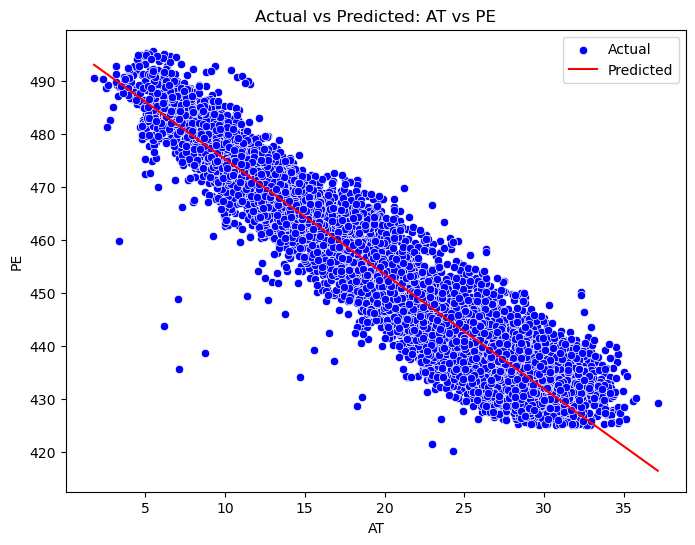

summary table for variable V is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:21:07   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.801

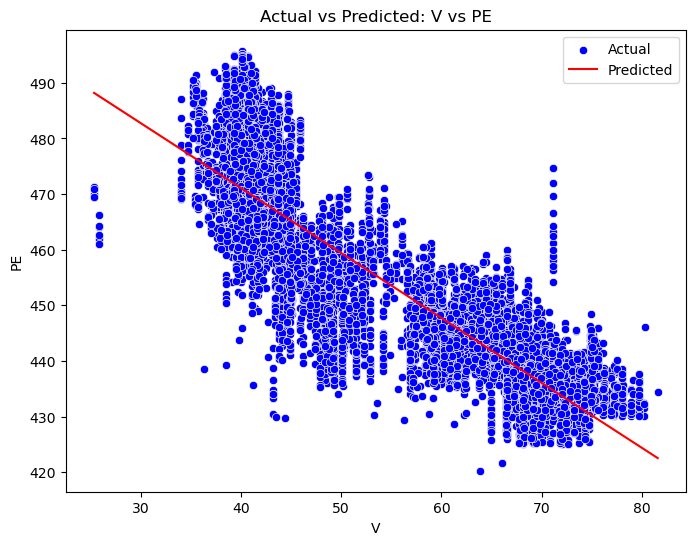

summary table for variable AP is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:21:07   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.26

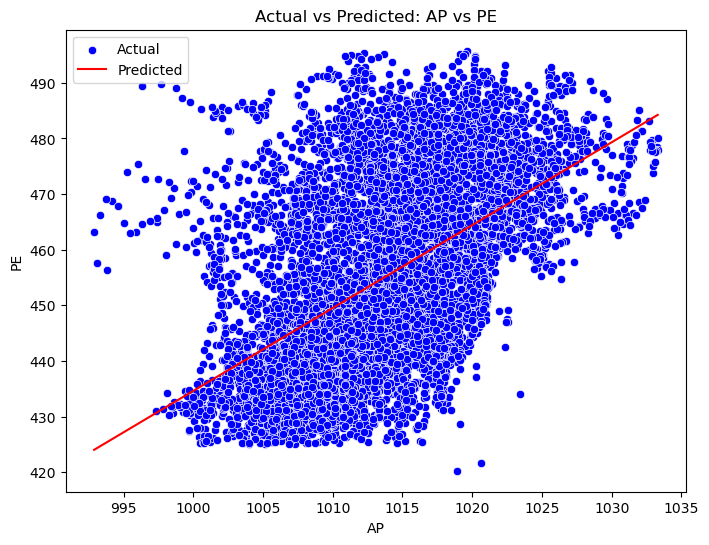

summary table for variable RH is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:21:07   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.96

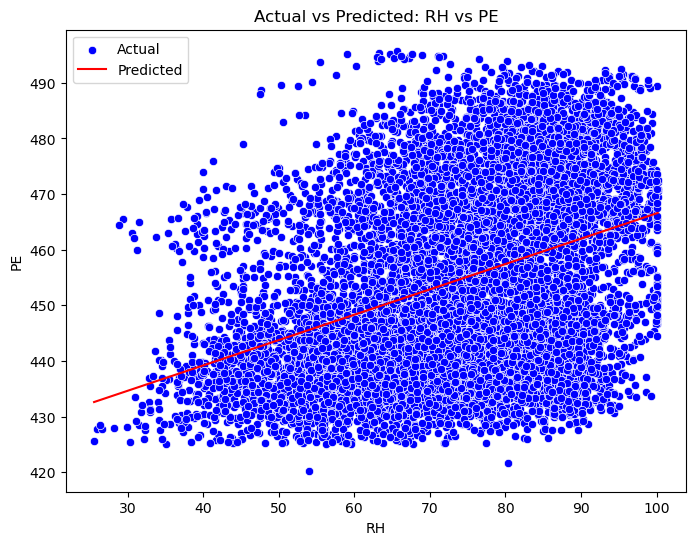

    Coefficient  P-Value  R-Squared
AT    -2.171320      0.0   0.898948
V     -1.168135      0.0   0.756518
AP     1.489872      0.0   0.268769
RH     0.455650      0.0   0.151939


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
for predictor in predictors:
    print('summary table for variable', predictor, 'is' , summaries[(predictors.index(predictor))])
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[predictor], y=df['PE'], label='Actual', color='blue')
    sns.lineplot(x=df[predictor], y=results[predictor]['predictions'], label='Predicted', color='red')
    plt.title(f'Actual vs Predicted: {predictor} vs PE')
    plt.xlabel(predictor)
    plt.ylabel('PE')
    plt.legend()
    plt.show()

print(results_df)

Observations:
1. From the above table we see that p value is almost zero indicating strong evidence against the null hypothesis.
2. The R-sqaured determines the proportion of variance in the dependent variable that can be explained by the independent variable. From the table it is seen that AT and V has higher R-sqaured value which fits the data well.
3. From the graphs and the co-efficients from the table, we can observe that 
4. For Ambient variable temperature AT, The model shows a strong and significant negative association with Energy Output (PE). 
5. There is a also significant negative association between Exhaust Vacuum (V) and Energy Output (PE). 
6. The lower R-squared value and posiitve coefficients of Ambient Pressure (AP)and Relative humidity (RH) shows weaker, but positive relationship to output variable Energy output. 


Outliers - reference - Introduction to statistical learing by Hasting, Tibshirani 

To find outliers, we can plot the studentized residuals, computed by dividing each residual ei by its estimated standard studentized
residual error. Observations whose studentized residuals are greater than 3 in absolute value are possible outliers.

In [10]:

response = 'PE'
def fit_and_identify_outliers(data, predictor, response):
    X = df[[predictor]]
    X = sm.add_constant(X)
    y = df[response]
    model = sm.OLS(y, X).fit()
    
    # Perform outlier test
    test = model.outlier_test()
    
    # Identify outliers (studentized residuals greater than 3)
    outliers = data[test['student_resid'].abs() > 3]
    
    return model, outliers

models_with_outliers = {}
outliers_dict = {}

for predictor in predictors:
    model, outliers = fit_and_identify_outliers(df, predictor, response)
    models_with_outliers[predictor] = model
    outliers_dict[predictor] = outliers
    print(f"Number of outliers for {predictor}: {outliers.shape[0]}")
    
# Remove outliers from data
for predictor in predictors:
    outliers = outliers_dict[predictor]
    data = df.drop(outliers.index)

models_without_outliers = {}

for predictor in predictors:
    X = data[[predictor]]
    X = sm.add_constant(X)
    y = data[response]
    model = sm.OLS(y, X).fit()
    models_without_outliers[predictor] = model

# Comparing models
for predictor in predictors:
    print(f"\nComparison for {predictor}:\n")
    print("With outliers:\n", models_with_outliers[predictor].summary())
    print("Without outliers:\n", models_without_outliers[predictor].summary())
    print("\n" + "-"*80 + "\n")


Number of outliers for AT: 42
Number of outliers for V: 33
Number of outliers for AP: 30
Number of outliers for RH: 2

Comparison for AT:

With outliers:
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:24:47   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

we have a few outliers for each predictors but comparing the results obtained after removing them, we see that there is no significant change and hence removing them wont make a difference. It is typical for an outlier that does not have an unusual
predictor value to have little efect on the least squares fit. (reference from text book)

(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 :Beta j = 0?

In [11]:
response = 'PE'
predictors = ['AT', 'V', 'AP', 'RH']
multivariate_coefficients ={}
y = df[response]
X = df[predictors]
X = sm.add_constant(X)  # Add an intercept to the model
model = sm.OLS(y, X).fit()
multivariate_coefficients =model.params[predictors]
model_summary = model.summary()
print(model_summary)


significant_predictors = model.pvalues[model.pvalues < 0.05].index.tolist()
print(f"\nSignificant predictors at 0.05 significance level: {significant_predictors}")
print(multivariate_coefficients)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:24:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

From the summary table we see that p values of all the predictors are 0.000 which is 0.05, and hence we can say all of the predictors reject the null hypothesis.

e. How do your results from 4c compare to your results from 4d? Create a plot
displaying the univariate regression co-efficients from 4c on the x-axis, and the
multiple regression coefficients from 4d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficients in a simple linear regression
model is shown on the x-axis, and its coefficients estimate in the multiple linear
regression model is shown on the y-axis.

univariate_coefficients: {'AT': -2.171319958517788, 'V': -1.168135126555709, 'AP': 1.4898716733991129, 'RH': 0.4556501022629822}
multiple_coefficients : AT   -1.977513
V    -0.233916
AP    0.062083
RH   -0.158054
dtype: float64


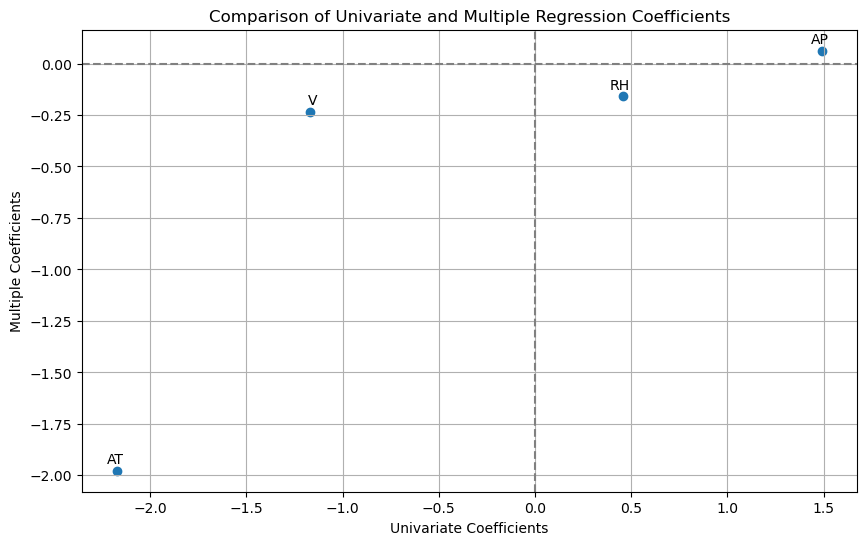

In [12]:
print('univariate_coefficients:',univariate_coefficients)
print('multiple_coefficients :', multivariate_coefficients)
# Create a DataFrame to compare the coefficients
comparison_df = pd.DataFrame({
    'Univariate': univariate_coefficients,
    'Multiple': multivariate_coefficients
})

plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Univariate'], comparison_df['Multiple'])
plt.xlabel('Univariate Coefficients')
plt.ylabel('Multiple Coefficients')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')

# Annotate each point with the predictor name # took help of chatGPT for annotatoin code
for predictor in predictors:
    plt.annotate(predictor, 
                 (comparison_df.loc[predictor, 'Univariate'], 
                  comparison_df.loc[predictor, 'Multiple']),
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='right')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


The difference in co-efficients tells us the shared variance with other predictors.

AT (Ambient Temperature): Shows a consistent negative effect on PE across both models, indicating a strong and stable influence on the response variable.

Influence of Multicollinearity:
V (Exhaust Vacuum), AP (Ambient Pressure), and RH (Relative Humidity): The significant changes in their coefficients between univariate and multiple regression models suggest that these predictors share variance with each other. Their individual contributions are less significant when accounting for all predictors simultaneously.

f. Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form2
Y=β 
0
​
 +β 
1
​
 X+β 
2
​
 X 
2
 +β 
3
​
 X 
3
 +ϵ


In [13]:
from sklearn.preprocessing import PolynomialFeatures
def fit_polynomial_regression(data, predictor, response):
    poly = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = poly.fit_transform(data[[predictor]])
    X_poly = sm.add_constant(X_poly)  # Add an intercept to the model
    y = data[response]
    model = sm.OLS(y, X_poly).fit()
    return model.summary()


for predictor in predictors:
    print(f"Polynomial Regression Model for {predictor}:\n")
    print(fit_polynomial_regression(data, predictor, response))
    print("\n" + "-"*80 + "\n")

Polynomial Regression Model for AT:

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.297e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:24:48   Log-Likelihood:                -29092.
No. Observations:                9566   AIC:                         5.819e+04
Df Residuals:                    9562   BIC:                         5.822e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        49

Summary:

There is evidence of nonlinear relationships for all predictors (AT, V, AP, RH) with the response variable (PE). The quadratic and cubic terms are significant in most models.

Model Fit: The model fit is strongest for AT, as indicated by the highest R-squared value, while the model fit is weaker for AP and RH, despite the significance of their polynomial terms.
Conclusion

Strong Nonlinear Predictor: Ambient Temperature (AT) shows the most robust nonlinear relationship with PE.
Moderate Nonlinear Predictors: Exhaust Vacuum (V) shows a moderate nonlinear relationship.
Weak Nonlinear Predictors: Ambient Pressure (AP) and Relative Humidity (RH) show significant but weaker nonlinear relationships with PE.

detail analysis:
1. Ambient Temperature (AT)
R-squared: 0.912

All terms (linear, quadratic, and cubic) are statistically significant, (p<0.05) suggesting a strong nonlinear relationship between AT and PE. The high R-squared value indicates that the model explains a large portion of the variance in PE.

2. Exhaust Vacuum (V)
R-squared: 0.775

The linear and cubic terms are significant, but the quadratic term is not. This suggests some nonlinear relationship between V and PE, but the quadratic term does not add much explanatory power. The high R-squared value indicates a good fit overall.

3. Ambient Pressure (AP)
R-squared: 0.275

All terms (linear, quadratic, and cubic) are significant, indicating a nonlinear relationship between AP and PE. However, the R-squared value is relatively low, suggesting that AP alone does not explain much variance in PE.

4. Relative Humidity (RH)
R-squared: 0.154

All terms (linear, quadratic, and cubic) are significant, suggesting a nonlinear relationship between RH and PE. However, similar to AP, the R-squared value is low, indicating that RH alone does not explain much variance in PE.



(g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [14]:
print(predictors)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(df[predictors])
interaction_feature_names = poly.get_feature_names_out(predictors)


X_interactions_df = pd.DataFrame(X_interactions, columns=interaction_feature_names)


X_interactions_df = sm.add_constant(X_interactions_df)
y = df[response]

interaction_model = sm.OLS(y, X_interactions_df).fit()
interaction_model_summary = interaction_model.summary()
print(interaction_model_summary)

significant_interactions = interaction_model.pvalues[interaction_model.pvalues < 0.05]
significant_interaction_terms = significant_interactions.index
print(f"\nSignificant interaction terms at 0.05 significance level: {significant_interaction_terms}")

['AT', 'V', 'AP', 'RH']
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:24:48   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78

The interaction terms that are significant are - 

'AT V', 

'AT RH', 

'V AP', 

'AP RH' 

since they have p <0.05

h. Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a re-
gression model involving all possible interaction terms XiXj as well as quadratic
nonlinearities X2
j , and remove insignificant variables using p-values (be careful
about interaction terms). Test both models on the remaining points and report
your train and test MSEs.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

X_train_1 = train_data[predictors]
X_train_1 = sm.add_constant(X_train_1)
y_train = train_data[response]

model_1 = sm.OLS(y_train, X_train_1).fit()
# Evaluate Models
X_test_1 = sm.add_constant(test_data[predictors])
y_test = test_data[response]

# Predictions
y_pred_train_1 = model_1.predict(X_train_1)
y_pred_test_1 = model_1.predict(X_test_1)
# Calculate MSE
mse_train_1 = mean_squared_error(y_train, y_pred_train_1)
mse_test_1 = mean_squared_error(y_test, y_pred_test_1)


In [16]:
# Train Model 2
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_2 = poly.fit_transform(train_data[predictors])
feature_names = poly.get_feature_names_out(predictors)
X_train_2_df = pd.DataFrame(X_train_2, columns=feature_names, index=train_data.index)
X_train_2_df = sm.add_constant(X_train_2_df)

model_2 = sm.OLS(y_train, X_train_2_df).fit()

# Remove insignificant variables from Model 2
significant_vars = model_2.pvalues[model_2.pvalues < 0.05].index
X_train_2_significant = X_train_2_df[significant_vars]

model_2_significant = sm.OLS(y_train, X_train_2_significant).fit()

# Evaluate Models
X_test_1 = sm.add_constant(test_data[predictors])
y_test = test_data[response]

X_test_2 = poly.transform(test_data[predictors])
X_test_2_df = pd.DataFrame(X_test_2, columns=feature_names, index=test_data.index)
X_test_2_df = sm.add_constant(X_test_2_df)
X_test_2_significant = X_test_2_df[significant_vars]

y_pred_train_2 = model_2.predict(X_train_2_df)
y_pred_test_2 = model_2.predict(X_test_2_df)

y_pred_train_2_significant = model_2_significant.predict(X_train_2_significant)
y_pred_test_2_significant = model_2_significant.predict(X_test_2_significant)

mse_train_2 = mean_squared_error(y_train, y_pred_train_2)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)

mse_train_2_significant = mean_squared_error(y_train, y_pred_train_2_significant)
mse_test_2_significant = mean_squared_error(y_test, y_pred_test_2_significant)






In [17]:
print(f"Model 1 Train MSE: {mse_train_1}")
print(f"Model 1 Test MSE: {mse_test_1}")
print(f"Model 2 Train MSE: {mse_train_2}")
print(f"Model 2 Test MSE: {mse_test_2}")

print(f"Model 2 Significant Train MSE: {mse_train_2_significant}")
print(f"Model 2 Significant Test MSE: {mse_test_2_significant}")


Model 1 Train MSE: 20.580839725738695
Model 1 Test MSE: 21.239856938225603
Model 2 Train MSE: 17.88779961663327
Model 2 Test MSE: 18.64731247857156
Model 2 Significant Train MSE: 18.457177417725703
Model 2 Significant Test MSE: 19.22101895493219


Model 2 has lower MSEs for both training and test datasets compared to Model 1. This indicates that including interaction terms and quadratic terms improves the model's performance.

Model 2 Significant has slightly higher MSEs for both training and test datasets compared to Model 2. This suggests that while removing insignificant variables simplifies the model, it slightly reduces the model's predictive performance. (proves what is mentioned in ISLR textbook)

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k 2 f1; 2; : : : ; 100g that gives you the
best fit. Plot the train and test errors in terms of 1=k.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

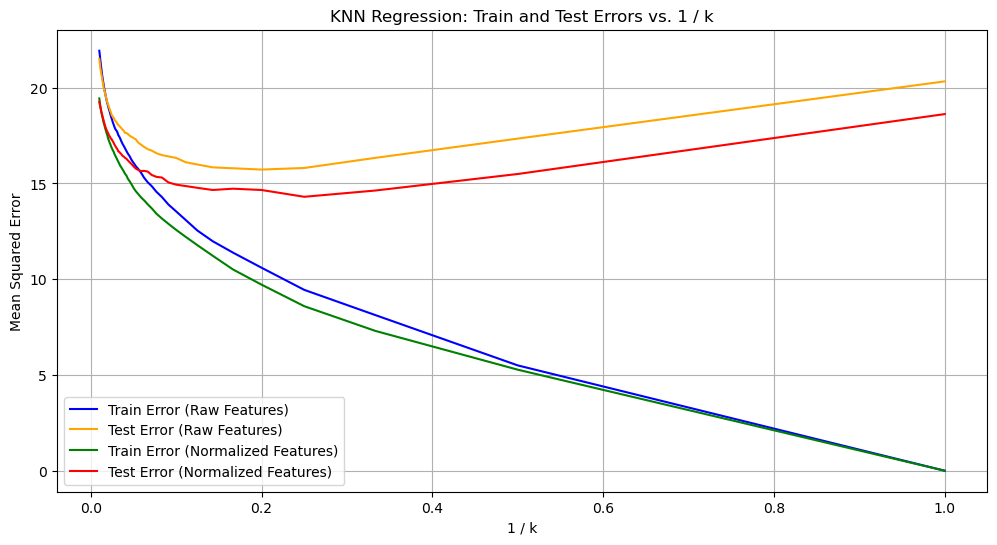

Best k (Raw Features): 5 with Test MSE: 15.726819842563568
Best k (Normalized Features): 4 with Test MSE: 14.305669422675024


In [20]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

X_train = train_data[predictors]
y_train = train_data[response]
X_test = test_data[predictors]
y_test = test_data[response]

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

train_errors_raw = []
test_errors_raw = []
train_errors_normalized = []
test_errors_normalized = []

k_values = range(1, 101)
for k in k_values:

    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred_raw))
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_normalized.fit(X_train_normalized, y_train)
    y_train_pred_normalized = knn_normalized.predict(X_train_normalized)
    y_test_pred_normalized = knn_normalized.predict(X_test_normalized)
    train_errors_normalized.append(mean_squared_error(y_train, y_train_pred_normalized))
    test_errors_normalized.append(mean_squared_error(y_test, y_test_pred_normalized))


plt.figure(figsize=(12, 6))


plt.plot(1 / np.array(k_values), train_errors_raw, label='Train Error (Raw Features)', color='blue')
plt.plot(1 / np.array(k_values), test_errors_raw, label='Test Error (Raw Features)', color='orange')

plt.plot(1 / np.array(k_values), train_errors_normalized, label='Train Error (Normalized Features)', color='green')
plt.plot(1 / np.array(k_values), test_errors_normalized, label='Test Error (Normalized Features)', color='red')

plt.xlabel('1 / k')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression: Train and Test Errors vs. 1 / k')
plt.legend()
plt.grid(True)
plt.show()

best_k_raw = k_values[np.argmin(test_errors_raw)]
best_mse_raw = min(test_errors_raw)

best_k_normalized = k_values[np.argmin(test_errors_normalized)]
best_mse_normalized = min(test_errors_normalized)

print(f"Best k (Raw Features): {best_k_raw} with Test MSE: {best_mse_raw}")
print(f"Best k (Normalized Features): {best_k_normalized} with Test MSE: {best_mse_normalized}")

(j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

KNN Regression Results
Best 
𝑘
k (Raw Features): 5 with Test MSE: 15.73
Best 
𝑘
k (Normalized Features): 4 with Test MSE: 14.31

Linear Regression Results
Model 1 (All Predictors): Test MSE: 21.24
Model 2 (All Predictors, Interaction and Quadratic Terms): Test MSE: 18.65
Model 2 Significant (Significant Terms from Model 2): Test MSE: 19.22
Analysis


Performance Comparison:

KNN Regression (Normalized Features): The best KNN model using normalized features achieves a test MSE of 14.31, which is significantly lower than the test MSE of the best linear regression model (Model 2) with a test MSE of 18.65.
KNN Regression (Raw Features): The best KNN model using raw features achieves a test MSE of 15.73, which is also lower than the test MSE of all linear regression models.
Model Complexity:

KNN Regression: KNN regression is a non-parametric method that can capture complex relationships in the data without assuming a specific form for the relationship between predictors and the response. However, it requires selecting the best 
𝑘
k and can be computationally expensive for large datasets.
Linear Regression: Linear regression models are parametric and assume a linear relationship between predictors and the response. While interaction and quadratic terms can capture some non-linearities, they may still fall short in capturing complex patterns compared to KNN regression.
Feature Normalization:

Normalized Features: 

Normalizing the features significantly improves the performance of KNN regression, reducing the test MSE from 15.73 (raw features) to 14.31 (normalized features).
Raw Features: Using raw features without normalization results in a higher test MSE for KNN regression.
Conclusion

Reference
https://www.statsmodels.org/stable/regression.html
https://www.tutorialspoint.com/seaborn/seaborn_implot_method.htm#:~:text=lmplot()%20method%20is%20used,combines%20FacetGrid%20and%20regplot().

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html